## Finding a pattern between datasets

* Predict with fbprophet :
Prophet follows the sklearn model API. We create an instance of the Prophet class and then call its fit and predict methods.
We use Prophet for datasets with only 2 columns, "ds" and "y",
which are datestamp and target values which we want to forecast.

### Let's predict the confirmeds in India

In [ ]:
#Creating india confirmed dataframe
india_confirmed = df_country.groupby("Date")["Confirmed"].sum().reset_index()
india_confirmed

,Date,Confirmed
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,2
3,2020-02-02,3
4,2020-02-03,3
...,...,...
507,2021-06-20,29881965
508,2021-06-21,29935221
509,2021-06-22,29977861
510,2021-06-23,30028709


In [ ]:
#changing the name of columns of india dataframe
india_confirmed.columns=["ds","y"]
india_confirmed["ds"]=pd.to_datetime(india_confirmed["ds"])

In [ ]:
from fbprophet import Prophet

In [ ]:
#fitting Prophet model
model_confirmed = Prophet()
model_confirmed.fit(india_confirmed)
future_confirmed = model_confirmed.make_future_dataframe(periods=21)
future_confirmed.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
528,2021-07-11
529,2021-07-12
530,2021-07-13
531,2021-07-14
532,2021-07-15


In [ ]:
#using Prophet to predict Covid-19 confirmed in the next 21days.
forecast_confirmed = model_confirmed.predict(future_confirmed)
forecast_confirmed[-13:]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
520,2021-07-03,3.350295e+07,3.259455e+07,3.445235e+07,3.346420e+07,3.354030e+07,10599.534081,10599.534081,10599.534081,10599.534081,10599.534081,10599.534081,0.0,0.0,0.0,3.351355e+07
521,2021-07-04,3.371563e+07,3.277331e+07,3.465125e+07,3.366614e+07,3.376504e+07,8270.642920,8270.642920,8270.642920,8270.642920,8270.642920,8270.642920,0.0,0.0,0.0,3.372390e+07
522,2021-07-05,3.392830e+07,3.303205e+07,3.480548e+07,3.386170e+07,3.399405e+07,3335.883747,3335.883747,3335.883747,3335.883747,3335.883747,3335.883747,0.0,0.0,0.0,3.393164e+07
523,2021-07-06,3.414098e+07,3.314571e+07,3.508555e+07,3.405720e+07,3.422393e+07,-7093.024248,-7093.024248,-7093.024248,-7093.024248,-7093.024248,-7093.024248,0.0,0.0,0.0,3.413389e+07
524,2021-07-07,3.435366e+07,3.337182e+07,3.528290e+07,3.425016e+07,3.445045e+07,-11993.992662,-11993.992662,-11993.992662,-11993.992662,-11993.992662,-11993.992662,0.0,0.0,0.0,3.434166e+07
525,2021-07-08,3.456633e+07,3.367250e+07,3.547946e+07,3.444307e+07,3.467326e+07,-12443.436811,-12443.436811,-12443.436811,-12443.436811,-12443.436811,-12443.436811,0.0,0.0,0.0,3.455389e+07
526,2021-07-09,3.477901e+07,3.385661e+07,3.572762e+07,3.463260e+07,3.490556e+07,9324.392973,9324.392973,9324.392973,9324.392973,9324.392973,9324.392973,0.0,0.0,0.0,3.478833e+07
527,2021-07-10,3.499168e+07,3.404083e+07,3.594575e+07,3.482066e+07,3.513442e+07,10599.534081,10599.534081,10599.534081,10599.534081,10599.534081,10599.534081,0.0,0.0,0.0,3.500228e+07
528,2021-07-11,3.520436e+07,3.424921e+07,3.616564e+07,3.501632e+07,3.536687e+07,8270.642920,8270.642920,8270.642920,8270.642920,8270.642920,8270.642920,0.0,0.0,0.0,3.521263e+07
529,2021-07-12,3.541703e+07,3.445626e+07,3.637472e+07,3.520964e+07,3.560229e+07,3335.883747,3335.883747,3335.883747,3335.883747,3335.883747,3335.883747,0.0,0.0,0.0,3.542037e+07


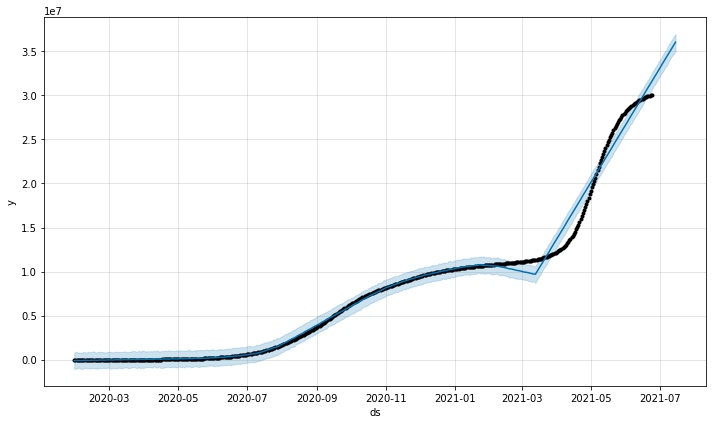

In [ ]:
#Visualize the prediction of Covid-19 confirmeds
model_confirmed.plot(forecast_confirmed);

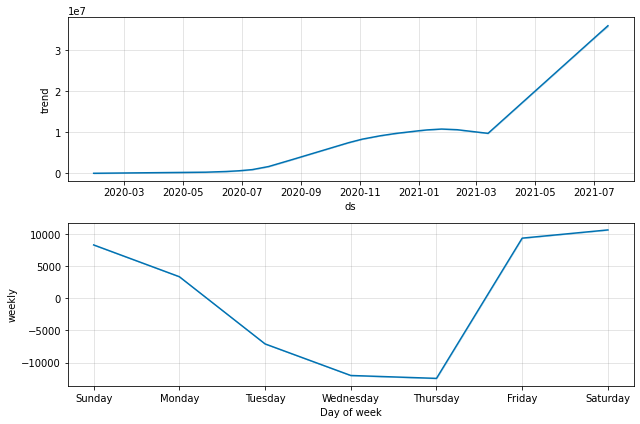

In [ ]:
#Visualize the prediction of Covid-19 confirmeds
model_confirmed.plot_components(forecast_confirmed);

### Let's predict the deaths in India

In [ ]:
#using Prophet to make next 21 days dataframe 
india_deaths = df_country.groupby("Date")["Deaths"].sum().reset_index()
india_deaths.columns=["ds","y"]
india_deaths["ds"]=pd.to_datetime(india_deaths["ds"])
india_deaths

,ds,y
0,2020-01-30,0
1,2020-01-31,0
2,2020-02-01,0
3,2020-02-02,0
4,2020-02-03,0
...,...,...
507,2021-06-20,386713
508,2021-06-21,388135
509,2021-06-22,389302
510,2021-06-23,390660


In [ ]:
#fitting Prophet model
model_deaths=Prophet()
model_deaths.fit(india_deaths)
future_deaths=model_deaths.make_future_dataframe(periods=21)
future_deaths.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
528,2021-07-11
529,2021-07-12
530,2021-07-13
531,2021-07-14
532,2021-07-15


In [ ]:
#using Prophet to predict Covid-19 deaths in the next 21days.
forecast_deaths=model_deaths.predict(future_deaths)
forecast_deaths[-20:]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
513,2021-06-26,374814.956753,359080.898379,389716.519397,374814.956753,374814.956753,-17.524002,-17.524002,-17.524002,-17.524002,-17.524002,-17.524002,0.0,0.0,0.0,374797.432751
514,2021-06-27,377135.450632,362710.621493,391311.513719,377135.450632,377135.450632,-1.489524,-1.489524,-1.489524,-1.489524,-1.489524,-1.489524,0.0,0.0,0.0,377133.961108
515,2021-06-28,379455.944511,364594.704571,393501.495479,379455.944511,379455.944511,1.201898,1.201898,1.201898,1.201898,1.201898,1.201898,0.0,0.0,0.0,379457.146409
516,2021-06-29,381776.438390,367534.573297,396480.700409,381753.844589,381815.795410,-36.829290,-36.829290,-36.829290,-36.829290,-36.829290,-36.829290,0.0,0.0,0.0,381739.609100
517,2021-06-30,384096.932269,369854.088361,398676.259597,384018.885064,384286.034513,25.169973,25.169973,25.169973,25.169973,25.169973,25.169973,0.0,0.0,0.0,384122.102242
518,2021-07-01,386417.426148,370795.030547,400297.070381,386208.731136,386747.450135,132.102700,132.102700,132.102700,132.102700,132.102700,132.102700,0.0,0.0,0.0,386549.528848
519,2021-07-02,388737.920027,374037.121590,402944.105777,388378.979133,389165.713211,-102.631757,-102.631757,-102.631757,-102.631757,-102.631757,-102.631757,0.0,0.0,0.0,388635.288270
520,2021-07-03,391058.413906,375764.544900,406089.776457,390549.932332,391658.304011,-17.524002,-17.524002,-17.524002,-17.524002,-17.524002,-17.524002,0.0,0.0,0.0,391040.889904
521,2021-07-04,393378.907785,378814.530973,408241.810980,392707.103297,394199.741291,-1.489524,-1.489524,-1.489524,-1.489524,-1.489524,-1.489524,0.0,0.0,0.0,393377.418261
522,2021-07-05,395699.401664,380888.265718,410514.977502,394823.979948,396676.911172,1.201898,1.201898,1.201898,1.201898,1.201898,1.201898,0.0,0.0,0.0,395700.603562


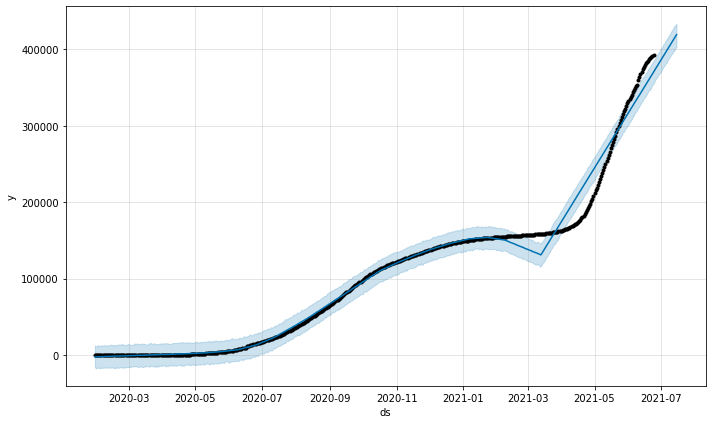

In [ ]:
#Visualize the prediction of Covid-19 deaths
model_deaths.plot(forecast_deaths);

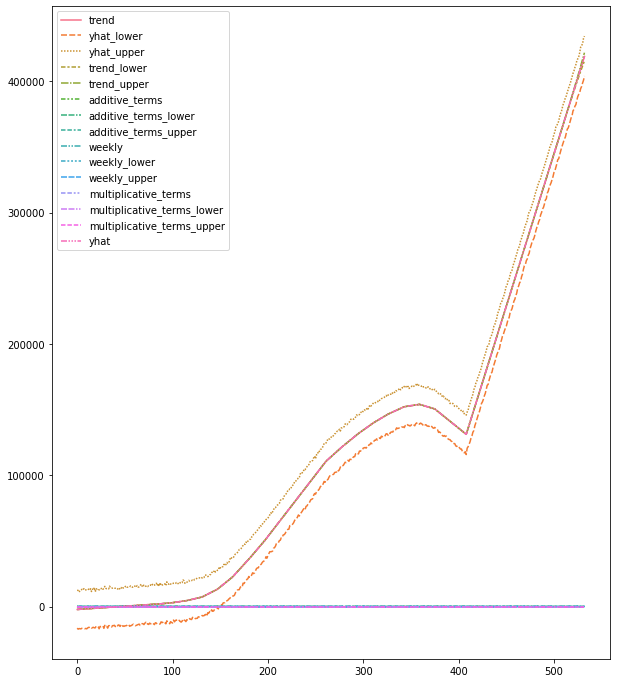

In [ ]:
#Visualize the prediction of Covid-19 deaths
fig=plt.figure(figsize=(10,12))
ax=sns.lineplot(data=forecast_deaths)
plt.show()

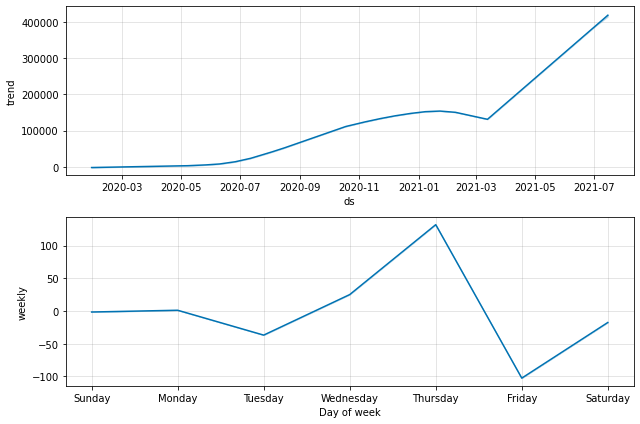

In [ ]:
#Visualize the prediction of Covid-19 deaths
model_deaths.plot_components(forecast_deaths);

# Thanks a Lot!
## Wish to live without Covid-19!